# Preprocessing lecture 12 March notebook

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
# Load the kc_house_data file
data = pd.read_csv(r'C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind-assignments\ML_preprocessing_module\data\kc_house_data.csv', index_col = [0])
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [68]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [69]:
data.info() # just because no non-null, doesn't mean nothing is missing! could have e.g. '?' or 'no information' or the like


<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21611 non-null  float64
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 1

In [70]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


In [71]:
#check if in any columns we have any np.inf or -np.inf
data[data.isin([np.nan, np.inf, -np.inf]).any(axis = 1)]
# We have 2 rows with NaNs in sqft_above column. Drop these rows from the data
data = data[~data.isin([np.nan, np.inf, -np.inf]).any(axis = 1)] # select all other rows that don't have NaN 9so basically, drop rows with NaN


In [72]:
# split the dataset into training and test datasets because when we make transormaations we want to train transformations on the training dataset
from sklearn.model_selection import train_test_split
X = data.drop(['price', 'date', 'zipcode'], axis=1) # also drop date column and zipcode for purposes of this example,date is not easy to interpret and zipcode is categorical with many unique values, on hot encoding/pd.get_dummies will explode the dataset
y= data['price'] 

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [73]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

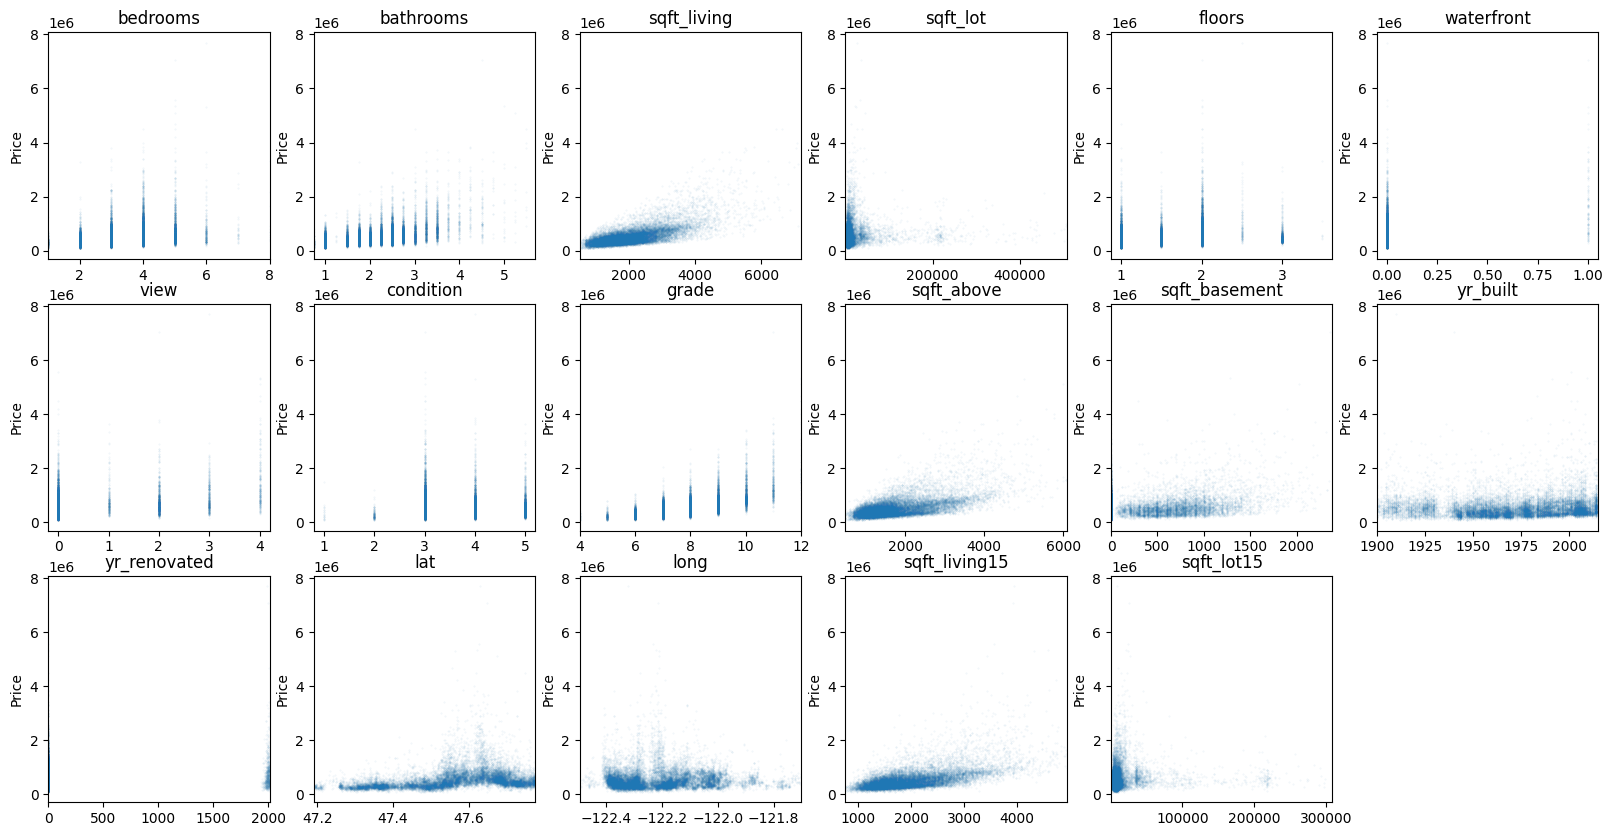

In [74]:
# create scatterplots for each of the features against price. We have 17 columns, so need subplots
fig, axes = plt.subplots(3,6, figsize = (20,10)) # creates 18 plots, 3x6 matrix.
axes.ravel() # turns the location of the axes object into a vector
for i, ax in enumerate(axes.ravel()): # i is for index, ax is for
    if i >16:
        ax.set_visible(False) # drop the last ax object
        continue # if i is not >17 then continue
    X_col = X_train.iloc[:,i] 
    if X_col.nunique()>10: # a way of identifying numeric columns
        ax.set_xlim(X_col.quantile(q=0.001), X_col.quantile(q=0.999)) # remove outliers? don't really get this part...
    ax.scatter(X_col, y_train, alpha = 0.1, s=0.1)
    ax.set_title(f'{X_train.columns[i]}')
    ax.set_ylabel('Price')

<Axes: >

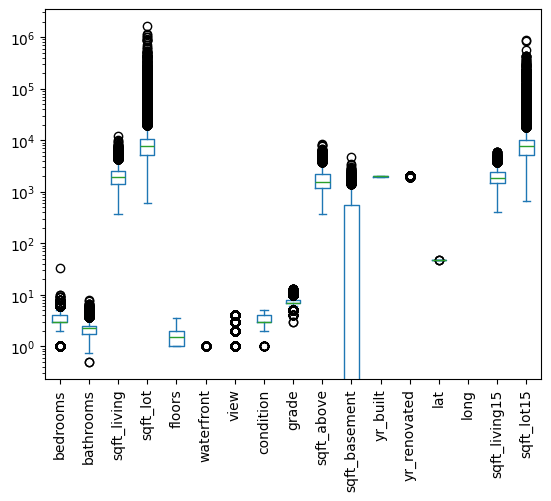

In [75]:
# Create boxplots of the features
X_train.plot(kind='box', logy=True, rot=90)

In [76]:
# We'll stop working on this housing dataset for now
df = pd.DataFrame({'name': ['Superman', 'Batman', 'Spiderman'],
                   'toy': [np.nan, 'Batmobile', 'Spiderman toy'], #NaN is a numpy missing value/not a number
                   'born': [pd.NaT, pd.Timestamp('1956-06-26'), pd.NaT]}) # NaT means 'not a timestamp'
df

,name,toy,born
0,Superman,NaN,NaT
1,Batman,Batmobile,1956-06-26
2,Spiderman,Spiderman toy,NaT


In [77]:
df.dropna() # drops all rows with any missing values (note this is not inplace)

,name,toy,born
1,Batman,Batmobile,1956-06-26


In [78]:
df.dropna(axis=1) # drop all columns with any missing values (note this is not inplace)

,name
0,Superman
1,Batman
2,Spiderman


In [79]:
df.dropna(how = 'all') # drop only rows that have missing values in every column
df.dropna(thresh=2) # drop only rows that have at least 2 missing values

,name,toy,born
1,Batman,Batmobile,1956-06-26
2,Spiderman,Spiderman toy,NaT


In [80]:
df.isna().sum() # counts up number of mussing values in each column

name    0
toy     1
born    2
dtype: int64

## Dealing with missing values
- Drop the rows containing missing values (see above)
- Impute the missing values with some other value

In [81]:
# Can do imputation manually or using sklearn
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') #this creates an imputer object that replaces np.nans in the data with the mean of the column
my_imputer.fit(X_train) # This will fit the simple imputer to our training data. Has learnt eg. the mean of all the columns for imputation
X_train_imp = my_imputer.transform(X_train) # Now you can run your X_train trained imputer on the X_train data to impute the missing vlaues
X_test_imp = my_imputer.transform(X_test) # Make sure you run your X_trained imputer on your X_test data

In [82]:
# In the housing dataset ck_house_data we want to run knn model. Relies on distance, so we need to scale the data first
from sklearn.preprocessing import StandardScaler
my_scaler = StandardScaler()
my_scaler.fit(X_train_imp)
X_train_scaled = my_scaler.transform(X_train_imp) # Can run in single line for X_train data: scaler.fit_transform(X_train_imp). Don't do this for X_test data though as need to use training fitted scalar!
X_test_scaled = my_scaler.transform(X_test_imp) # We don't fit our scalar again, we use the Training data trained scaler

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

### Difference between linear regression and ridge regression?
Linear regression -> try to find the coefficients (weights) for each variable such that when I multiply the coefficients with their corresponding variables I will get a good prediction of the target variable
e.g. PriceHat = w1*SqtLot + W2*NumBedrooms + W3*View etc. ('Hat' means prediction)
Price-Pricehat is to be minimised.
Linear regression works very well for large datasets. Very old, simple, but powerful model. BUT W sometimes takes very large or very low values (depending on the feature scale? Or just presenceabsence of outliers?), model is trying its best to fit the training data - if trained on training data using outliers, can mitigate using Ridge regression

Ridge is a LinearRegression with the addition of enforcing that W's cannot take really large or really small values (introdcues penalties)

In [84]:
# Perform cross-validation (on unscaled dataset)
scores = cross_val_score(Ridge(), X_train, y_train, cv=10) #cross_val_score requires Estimator (Risge regresion in this case, then the data, then number of folds. using 10-fold cos data is pretty big). Should return 10 scores
scores

array([0.68405324, 0.70636278, 0.68552364, 0.68766798, 0.66928814,
       0.72882988, 0.6848198 , 0.6520462 , 0.70818326, 0.67398727])

In [85]:
np.mean(scores), np.std(scores)

(np.float64(0.6880762212692197), np.float64(0.02069462722773938))

In [86]:
# Run cross_validation_score on scaled data (shouldn't make too much difference on Ridge regression)
scores_scaled = cross_val_score(Ridge(), X_train_scaled, y_train, cv=10)
np.mean(scores_scaled), np.std(scores_scaled) # Makes very little difference on cross validation scores. If we used knn/estimator that uses distance, would see a much bigger effect. Still good to scale though so that we can compare Ws across the different features though


(np.float64(0.6880688752693352), np.float64(0.020803724261035387))

In [87]:
# repeat the cross-validation scoring on Kneighbors regressor estimator
from sklearn.neighbors import KNeighborsRegressor
scores_n = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=10) #KNeighborsregressor is a regressor but does use distance, scaling should make a bigger difference
np.mean(scores_n), np.std(scores_n)

(np.float64(0.5004968324258467), np.float64(0.03598419079953567))

In [88]:
scores_n_scaled = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=10) # Scaling improves the results a lot!
np.mean(scores_n_scaled), np.std(scores_n_scaled)

(np.float64(0.7833625565722302), np.float64(0.025710910788209838))

## Pipelines

In [89]:
imputer = SimpleImputer()
X_train_imp = imputer.fit_transform(X_train)
# Scaling using sklearn
scaler = StandardScaler()
scaler.fit(X_train_imp)
X_train_scaled = scaler.transform(X_train_imp)

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn.score(X_train_scaled, y_train)

0.8620886258632285

In [90]:
X_test_imp = imputer.transform(X_test)
X_test_scaled = scaler.transform(X_test_imp)
knn.score(X_test_scaled, y_test)

0.7905188047224225

In [91]:
# Scaling using a pipelin
from sklearn.pipeline import make_pipeline

my_pipeline = make_pipeline(SimpleImputer(), StandardScaler(), KNeighborsRegressor())
my_pipeline.steps

[('simpleimputer', SimpleImputer()),
 ('standardscaler', StandardScaler()),
 ('kneighborsregressor', KNeighborsRegressor())]

In [92]:
my_pipeline.fit(X_train, y_train) # pipeline will first impute dataset, then scale it, and then train a KNeighborsRegressor model
my_pipeline.score(X_train, y_train)

0.8620886258632285

In [93]:
my_pipeline.score(X_test, y_test) # Takes test dataset, imputes and scales on basis of fit on training dataset, and then runs the model trained on the train dataset

0.7905188047224225

In [94]:
from sklearn.pipeline import Pipeline # using Pipeline, exactly the same as make_pipeline except that you can name directly your steps
my_pipeline2 = Pipeline((('imputer', SimpleImputer()),
 ('scaler', StandardScaler()),
 ('knr', KNeighborsRegressor())))


In [95]:
# Create a grid search for number of neighbors for KNeighborsRegressor n=1 to 10
from sklearn.model_selection import GridSearchCV
grid_params = {'knr__n_neighbors': np.arange(1,11)} # need name of estimator here so pipeline knows where the hyperparameter belongs to
my_grid1 = GridSearchCV(my_pipeline2, param_grid = grid_params, cv = 10)

In [96]:
my_grid1.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=(('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('knr', KNeighborsRegressor()))),
             param_grid={'knr__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [97]:
my_grid1.best_params_

{'knr__n_neighbors': np.int64(7)}

## Onehotencoding using scikit-learn
The logic to using ohe is to turn categorical variables into 1s and 0s for our algorithim. These values become weights for our model to enable comparison between, say, effect of living in New York on lief expectancy in comparison to _any other city_ that is not Los Angeles/other encoded cities. So it is not absolute effect of NY on life-expectancy, just effect of living in NY versus living in any other city

In [98]:
# Create a new df for onehotencoding (Lecture 17/03)
X_train = pd.DataFrame({'zip': ['23151', '12355'], # can make dfs from dictionaries (keys are col names, values are values)
                    'city': ['New York', 'Los Angeles']})

X_test = pd.DataFrame({'zip': ['91521', '23151'],
                    'city': ['Chicago', 'New York']})


In [99]:
# OneHotEncoder from scikit-learn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output= False) # Any categories not present in training data but in test will be ignored (assign 0 value to them). sparse_output gives you the entire np array (not the sparse one without zeros)

In [100]:
# Fit my ohe on my training dataset
ohe.fit(X_train)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [101]:
# Transform the train dataset with ohe
ohe.transform(X_train) 
ohe.get_feature_names_out()

array(['zip_12355', 'zip_23151', 'city_Los Angeles', 'city_New York'],
      dtype=object)

In [102]:
# Generate a new one hot encoded df for our training dataset
pd.DataFrame(ohe.transform(X_train), columns = ohe.get_feature_names_out())

,zip_12355,zip_23151,city_Los Angeles,city_New York
0,0.0,1.0,0.0,1.0
1,1.0,0.0,1.0,0.0


In [103]:
# Now run the oh encoder on the test dataset 
pd.DataFrame(ohe.transform(X_test), columns = ohe.get_feature_names_out()) # ohe was trained on X_train data, which is why Chicago not on there (and handle_unknown is 'ignore') 

,zip_12355,zip_23151,city_Los Angeles,city_New York
0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0


## Column transformer with mixed types

In [104]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer # Like a 'pipeline of pipelines' transformaing the columns of dofferent data types in different ways (eg scaling the numnerical data ohe'ing the categorical variables)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression 

In [105]:
# Generate a new example df
df = pd.DataFrame({'brand': ['BMW', 'Pepsi', 'Mac', np.nan],
                   'category': ['car', 'drink', 'computer', 'Unknown'],
                   'num1': [1, 1, 0, 0],
                   'target': [0.2, 0.11, 1.34, 1.123]})
df

,brand,category,num1,target
0,BMW,car,1,0.200
1,Pepsi,drink,1,0.110
2,Mac,computer,0,1.340
3,NaN,Unknown,0,1.123


In [106]:
# Check the dtypes of the df
df.dtypes

brand        object
category     object
num1          int64
target      float64
dtype: object

### Determine and assign your variables as categorical or numeric for your transformers

In [107]:
categorical = df.dtypes==object #vCreates boolean variable 'categorical'
categorical

brand        True
category     True
num1        False
target      False
dtype: bool

In [108]:
numerical = ~categorical
numerical

brand       False
category    False
num1         True
target       True
dtype: bool

In [109]:
# Another way to do this is to explicitly assign them manually
numeric_features = ['num1']
categorical_features = ['brand','category']

In [110]:
# Create numeric transformer Pipeline whose steps are a list of transformers (first arg is your custom name for the transformer, second is the transformer itself)
numeric_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'median')), # note all the brackets here!
                                        ('scaler', StandardScaler())])

In [111]:
# Create categorical transformer pipeline
categorical_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')), # fill in missing values with the same value 'missing'
                                            ('ohe', OneHotEncoder(handle_unknown = 'ignore'))])

In [112]:
# Now we can put together these two transformers together using a column transformer
preprocessor = ColumnTransformer(transformers = [('num', numeric_transformer, numeric_features),
                                                 ('cat', categorical_transformer, categorical_features)])

Now we have our preprocessor pipeline built, made up of both numeric and categorical pipelines to handle different features in our dataset.
Data --> split the data into train and test--> preprocess --> train a model --> test the model

In [113]:
# Now we can put 'preprocess' pipeline and 'train a model' pipeline into a single pipeline, too!
myreg = Pipeline(steps = [ ('prep', preprocessor),
                  ('model',LinearRegression())])

In [114]:
X8 = df.drop('target', axis=1)
y8 = df.target

In [115]:
myreg.fit(X8, y8)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['num1']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['brand', 'category'])])),
                ('model', LinearRegression())])

In [116]:
# Can we see what is going on inside the indivifdal transformers?
# List each of the named steps in your pipeline
print(myreg.named_steps)


{'prep': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['num1']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['brand', 'category'])]), 'model': LinearRegression()}


In [117]:
# Select your preprocessor pipeline, then select your transformers here (list of tuples), enter the second transformer (the categorical transformer), and the steps second [1]
myreg.named_steps['prep'].transformers_[1][1].named_steps['ohe'].get_feature_names_out(categorical_features) # the '_' after.transformers is crucial here as it indicates we are referring to the fitted transformers!

array(['brand_BMW', 'brand_Mac', 'brand_Pepsi', 'brand_missing',
       'category_Unknown', 'category_car', 'category_computer',
       'category_drink'], dtype=object)

Why is all of this important? You can do these steps manually and concatenate a transformed dataset. Challenging though with multiple transformations, easy to make mistakes! A pipeline of transformers will help a lot, but you also need to be able to access individual aspects within the transformers e.g. for plotting.

### Final example: using a column transformer on the Titanic dataset 

In [118]:
# Read in the titanic dataset
df = pd.read_csv(r"C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind-assignments\ML_preprocessing_module\data\Titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [119]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [120]:
X = df.drop(['boat','body','cabin','home.dest','name','ticket','sibsp','parch'], axis =1)

In [121]:
print(X.columns)
print(X.shape)

Index(['pclass', 'survived', 'sex', 'age', 'fare', 'embarked'], dtype='object')
(1309, 6)


In [122]:
# Check for duplicates
X.duplicated().sum()

np.int64(215)

In [123]:
X.drop_duplicates(inplace = True) # Remove duplicates. Be careful though! these might actaully be different people...

## Explore the dataset for missing values

In [124]:
y = X.survived
X = X.drop('survived', axis = 1)

In [125]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    1094 non-null   int64 
 1   sex       1094 non-null   object
 2   age       1094 non-null   object
 3   fare      1094 non-null   object
 4   embarked  1094 non-null   object
dtypes: int64(1), object(4)
memory usage: 51.3+ KB


In [127]:
X.nunique() # shows the number of unique values for each feature

pclass        3
sex           2
age          99
fare        282
embarked      4
dtype: int64

In [128]:
np.unique(X.age, return_counts = True) # Note the missing values '?' here (has 128 counts)

(array(['0.1667', '0.3333', '0.4167', '0.6667', '0.75', '0.8333', '0.9167',
        '1', '10', '11', '11.5', '12', '13', '14', '14.5', '15', '16',
        '17', '18', '18.5', '19', '2', '20', '20.5', '21', '22', '22.5',
        '23', '23.5', '24', '24.5', '25', '26', '26.5', '27', '28', '28.5',
        '29', '3', '30', '30.5', '31', '32', '32.5', '33', '34', '34.5',
        '35', '36', '36.5', '37', '38', '38.5', '39', '4', '40', '40.5',
        '41', '42', '43', '44', '45', '45.5', '46', '47', '48', '49', '5',
        '50', '51', '52', '53', '54', '55', '55.5', '56', '57', '58', '59',
        '6', '60', '60.5', '61', '62', '63', '64', '65', '66', '67', '7',
        '70', '70.5', '71', '74', '76', '8', '80', '9', '?'], dtype=object),
 array([  1,   1,   1,   1,   2,   3,   2,  10,   4,   4,   1,   3,   5,
          8,   2,   6,  19,  17,  36,   3,  25,  12,  20,   1,  33,  36,
          1,  22,   1,  44,   1,  29,  25,   1,  26,  27,   3,  28,   7,
         35,   2,  22,  22,   4,  21,

In [129]:
# How can I check my columns to see whether there are non-numeric values in there?
# Check each column for non-numeric values
non_numeric_columns = {}

for col in X.columns:
    # Attempt to convert the column to numeric
    non_numeric_mask = pd.to_numeric(X[col], errors='coerce').isna()
    
    # If any non-numeric values are found, record the column
    if non_numeric_mask.any():
        non_numeric_columns[col] = X[col][non_numeric_mask].unique()

# Display columns with non-numeric values
print("Columns with non-numeric values and the values found:")
for col, values in non_numeric_columns.items():
    print(f"{col}: {values}")

Columns with non-numeric values and the values found:
sex: ['female' 'male']
age: ['?']
fare: ['?']
embarked: ['S' 'C' '?' 'Q']
